# <center> Недельная и месячная сезонность

## Этот файл содержит вспомогательные функции для отрисовки графиков и группировки данных

In [139]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка и обработка данных

In [2]:
data = pd.read_excel("q011.xlsx")

In [92]:
data.head()

,Код склада,Название склада,Дата,Код гр.,Название гр.,Код товара,1 наименование,2 наименование,кол-во,Сумма в пр.ценах,Сумма в ср. зак,Сумма в баз. Ценах,Стоимость одной штуки
0,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23141391,Щетка зубная Oral-B Advantage Artic,Щетка зубная Oral-B Advantage Artic,2,330.0,160.74,350.0,175.0
1,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23310100,Мыло Absolut 90г алоэ,Мыло Absolut 90г алоэ,1,33.0,21.53,35.0,35.0
2,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23310483,Паста зубная Семейная в тубе кора дуба,Паста зубная Семейная в тубе кора дуба мать-ма...,1,44.0,24.08,45.0,45.0
3,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23320536,Прокладки гигиенические Libresse Инвизиб,Прокладки гигиенические Libresse Инвизибл Норм...,1,129.0,80.64,129.0,129.0
4,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23320680,Порошок зубной Мятный,Порошок зубной Мятный,1,28.0,16.23,29.0,29.0


In [4]:
print('Кол-во уникальных товаров: ', data['Код товара'].unique().shape)
print('Объем данных: ', data.shape)

Кол-во уникальных товаров:  (1886,)
Объем данных:  (853384, 13)


In [5]:
codes = data['Код товара'].unique()

In [6]:
data_code_test = data.loc[data['Код товара'] == codes[40]][['Дата', '1 наименование', 'кол-во', 'Стоимость одной штуки']]
data_code_test.head()

,Дата,1 наименование,кол-во,Стоимость одной штуки
42,2017-03-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
97,2017-05-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
118,2017-06-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
177,2017-08-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
282,2017-11-07,Паста зубная СилкаМед Целебные травы 130,1,49.0


## Выбор оптимального временного шага 

Будем рассматривать графики количества продаж, сгруппированные по разным временным промежуткам. (день, неделя, месяц)

Создадим игструменты для удобной и быстрой группировки данных  и отрисовки графиков.

In [12]:
data_code_test.columns = ['date', 'name', 'quantity', 'price'] # так будет удобнее работать, переименуем столбцы

In [11]:
data_code_test.head()

,date,name,quantity,price
42,2017-03-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
97,2017-05-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
118,2017-06-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
177,2017-08-07,Паста зубная СилкаМед Целебные травы 130,1,49.0
282,2017-11-07,Паста зубная СилкаМед Целебные травы 130,1,49.0


Будем строить график при определенной цене, такой подход поможет лучше понять влияние тренда и сезонности на продажи разных товаров. 

In [16]:
data_code_test.price.unique()

array([49., 39., 54., 43., 59., 48., 69.])

In [67]:
price1 = data_code_test[data_code_test['price'] == 49.0]
x = price1[['date', 'quantity']]

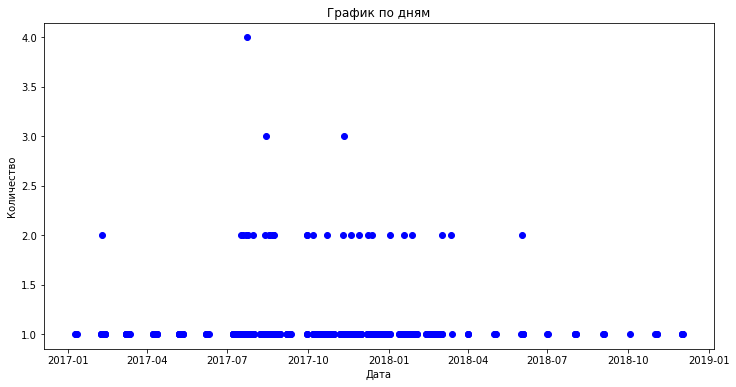

In [115]:
plt.figure(figsize = (12, 6))
plt.plot(x.date.values, x.quantity.values, 'bo')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.title('График по дням')
plt.show()

График по дням недостаточно информативен. Предсказывать такую целевую переменную, используя только временной ряд, дело неблагодарное.

In [114]:
def addYearWeekDay(df, timestamp = ['year', 'week']): 
    try:
        if 'year' in timestamp:
            df['year'] = list(list(map(lambda x: x.year, df.date)))
        if 'week' in timestamp:
            df['week'] = list(list(map(lambda x: x.week, df.date)))
        if 'day' in timestamp:
            df['day'] = list(list(map(lambda x: x.year, df.date)))
        if 'month' in timestamp:
            df['month'] = list(list(map(lambda x: x.month, df.date)))
    except:
        print('Expected date column in df')
    return df
# Эта функция вытаскивает из даты год, неделю или день

Функция <b>addYearWeekDay</b> принимает на вход 2 аргумента: <b> DateFrame </b>, в котором есть столбец с названием <b>date</b>, в нём должны содержаться даты в формате pandas. Второй аргумент - список из требуемых сезонных компонент.

Функция возвращает <b> DateFrame </b> с новыми столбцами.

In [101]:
price1 = addYearWeekDay(price1)
price1.head()

,date,name,quantity,price,year,week
42,2017-03-07,Паста зубная СилкаМед Целебные травы 130,1,49.0,2017,10
97,2017-05-07,Паста зубная СилкаМед Целебные травы 130,1,49.0,2017,18
118,2017-06-07,Паста зубная СилкаМед Целебные травы 130,1,49.0,2017,23
177,2017-08-07,Паста зубная СилкаМед Целебные травы 130,1,49.0,2017,32
282,2017-11-07,Паста зубная СилкаМед Целебные травы 130,1,49.0,2017,45


In [105]:
price1 = price1[['quantity', 'year', 'week']].groupby(['year', 'week']).sum()

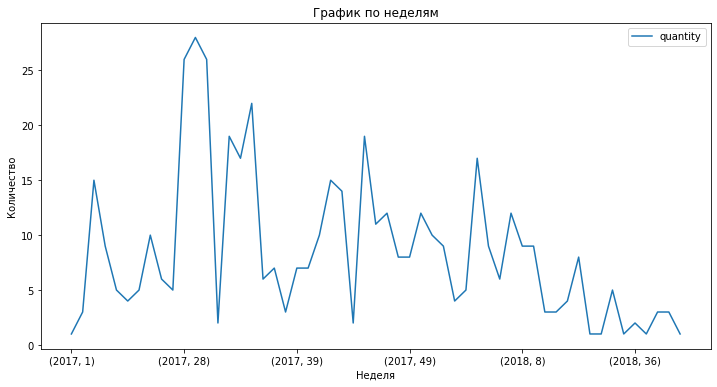

In [113]:
price1.plot(figsize=(12, 6))
plt.xlabel('Неделя')
plt.ylabel('Количество')
plt.title('График по неделям')
plt.show()

Этот график уже понятнее, можно заметить сезонность и низходящий тренд в 2018 году.

In [148]:
def get_code_plot_grouped(df, code, seasonal = ['year', 'week'], price = 'auto'):
    data_code_test = df.loc[data['Код товара'] == codes[code]][['Дата', '1 наименование', 'кол-во', 'Стоимость одной штуки']]
    data_code_test.columns = ['date', 'name', 'quantity', 'price']
    prices = data_code_test.price.unique()
    if price == 'in':
        print(prices)
        p_arr = [float(input('Chose price: '))]
    elif price == 'all':
        p_arr = prices
    else:
        p_arr = [prices[0]]
    for p in p_arr:
        price_df = data_code_test[data_code_test['price'] == p]
        translation = {'week': 'неделям', 'day': 'дням', 'month': 'месяцам'}
        price_df = addYearWeekDay(price_df, timestamp=seasonal)
        price_df = price_df[['quantity', seasonal[0], seasonal[1]]].groupby([seasonal[0], seasonal[1]]).sum()
        price_df.plot(figsize=(12, 6))
        plt.xlabel(seasonal[1])
        plt.ylabel('Количество, Цена: ' + str(p))
        plt.title('График по ' + translation[seasonal[1]])
        plt.show()     

Функция <b>get_code_plot_grouped</b> отрисовывает график количества проданного товара, данный сгруппированы с нужным временным шагом. 

Аргументы функции: 

<b>DataFrame</b> - таблица, где содержится информация о товарах

<b>code</b> - код товара

<b>seasonal</b> - сезонный шаг (по умелчанию неделя)
 
<b>price</b> - цена товара (по умолчанию первая)

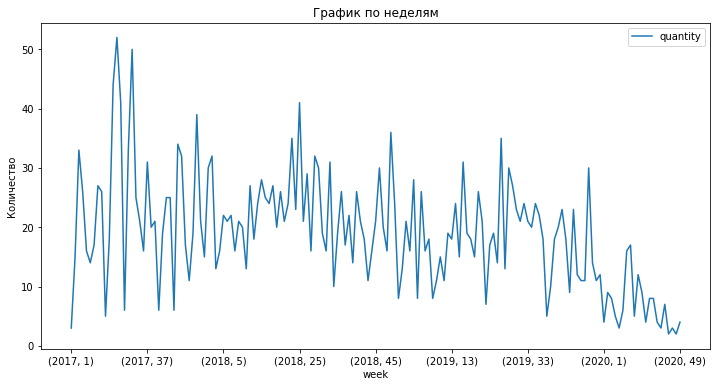

In [145]:
get_code_plot_grouped(data, 43)

Теперь рассмотрим график по месяцам. 

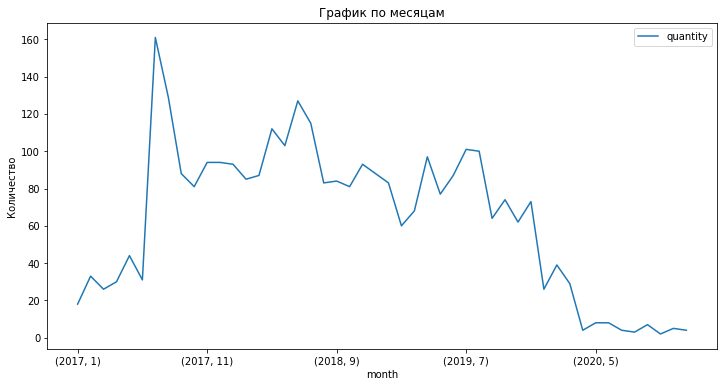

In [146]:
get_code_plot_grouped(data, 43, ['year', 'month'])

График по месяцам несёт меньше информации о сезонности, мы теряем недельную сезонность. 

## Вывод: 

### Неделя - оптимальный временной шаг

## Отличия и сходства графиков при разных ценах

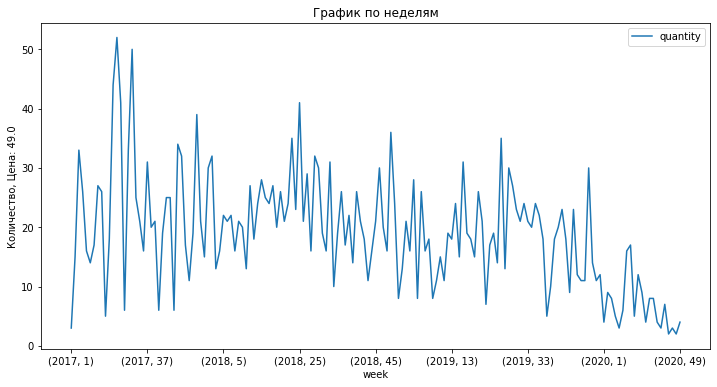

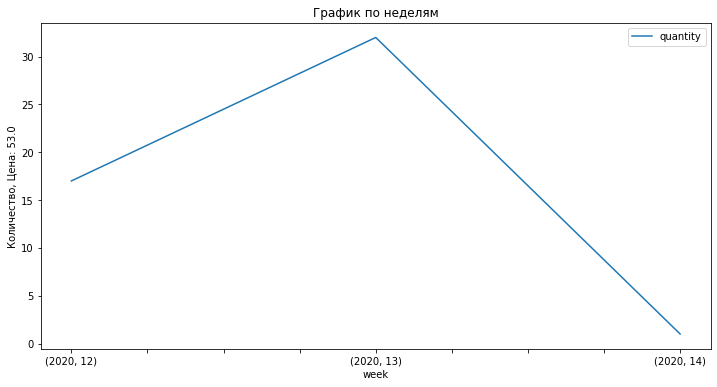

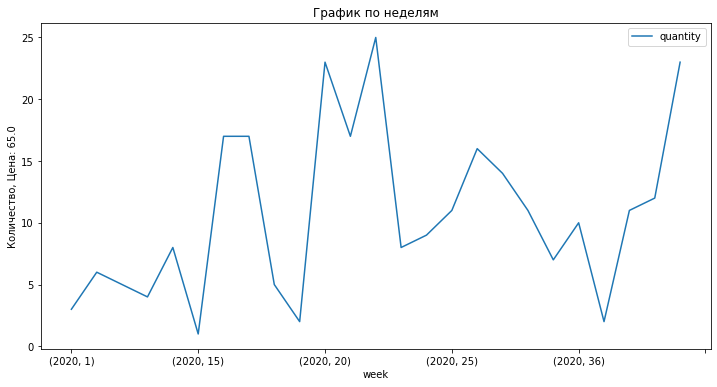

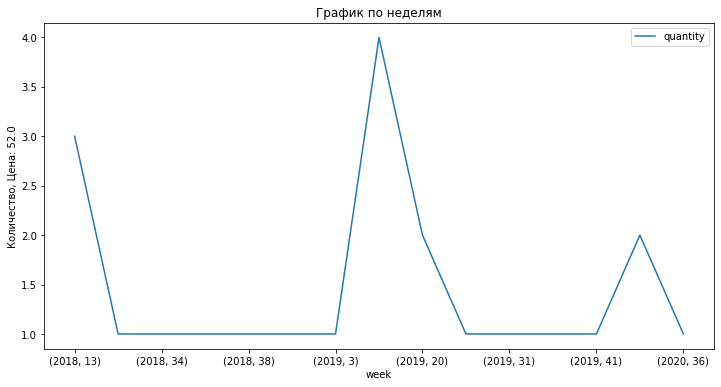

In [149]:
get_code_plot_grouped(data, 43, ['year', 'week'], 'all')

Функция может отрисовывать как все, так и отдельные цены. Это должно упростить работу аналитика.